## 一、模型结构

线性回归的模型结构表示：
$$
f(x)=w^Tx^*
$$
$$
x^* = [x^T,1]^T,x∈R^n
$$
w为要学习的参数


In [5]:
import numpy as np

X = np.linspace(0,100,100)#0-100,平均取100个
X = np.c_[X, np.ones(100)] #按第二个轴拼接两个矩阵
w = np.asarray([3,2]) 
Y = X.dot(w)
#print(Y.shape[0])
X = X.astype('float')
Y = Y.astype('float')
X[:,0]+= np.random.normal(size=(X[:,0].shape))*3

In [6]:
Y = Y.reshape(100,1)

Text(0, 0.5, 'Y')

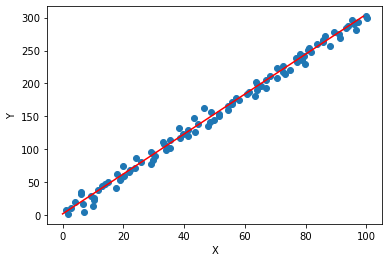

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(X[:,0],Y)#散点图
plt.plot(np.arange(0,100).reshape((100,1)),Y,'r')
plt.xlabel('X')
plt.ylabel('Y')

In [9]:
w = np.random.random(size=(2,1))
epoches = 100
eta = 0.0000001
losses = []
for _ in range(epoches):
    dw = -2*X.T.dot(Y-X.dot(w))
    w = w - eta*dw
    losses.append((Y-X.dot(w)).T.dot(Y-X.dot(w)).reshape(-1))
w

array([[3.02691784],
       [0.4296758 ]])

Text(0, 0.5, 'Y')

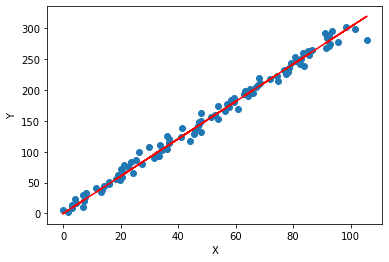

In [99]:
#可视化
#print(X)
plt.scatter(X[:,0],Y)
plt.plot(X[:,0],X.dot(w),'r')
plt.xlabel('X')
plt.ylabel('Y')

Text(0, 0.5, 'loss')

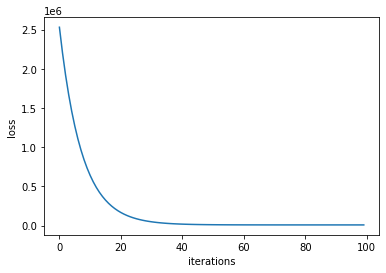

In [100]:
#loss变化
plt.plot(losses)
plt.xlabel('iterations')
plt.ylabel('loss')

In [101]:
class LinearRegression(object):
    def __init__(self, fit_intercept=True, solver='sgd', if_standard=True, epochs=10, eta=1e-2, batch_size=1):
        self.w = None
        self.fit_intercept = fit_intercept
        self.solver = solver
        self.if_standard = if_standard
        if if_standard:
            self.feature_mean = None
            self.feature_std = None
        self.epochs = epochs
        self.eta = eta
        self.batch_size = batch_size
    
    def init_params(self, n_features):
        """
        初始化参数
        """
        self.w = np.random.random(size=(n_features,1))
    
    def _fit_closed_form_solution(self, x, y):
        """
        直接求闭式解
        :param x:
        :param y:
        :return:
        """
        self.w = np.linalg.pinv(x).dot(y)
    
    def _fig_sgd(self, x, y):
        """
        随机梯度下降求解
        :param x:
        :param y:
        :param epochs:
        :param eta:
        :param batch_size:
        :return:
        """
        x_y=np.c_[x, y]
        #按batch_size更新w,b
        for _ in range(self.epochs):
            np.random.shuffle(x_y)
            for index in range(x_y.shape[0] // self.batch_size):
                batch_x_y = x_y[self.batch_size * index:self.batch_size * (index + 1)]
                batch_x = batch_x_y[:, :-1]
                batch_y = batch_x_y[:, -1:]

                dw = -2*batch_x.T.dot(batch_y - batch_x.dot(self.w))/self.batch_size
                self.w = self.w - self.eta * dw
    
    def fit(self, x, y):
        #是否归一化feature
        if self.if_standard:
            self.feature_mean = np.mean(x, axis=0)
            self.feature_std = np.std(x, axis=0)+ 1e-8
            x =(x - self.feature_mean)/self.feature_std
        #是否训练bias
        if self.fit_intercept:
            x = np.c_[x, np.ones_like(y)]
        #初始化参数
        self.init_params(x.shape[1])
        #训练模型
        if self.solver == 'closed_form':
            self._fit_closed_form_solution(x, y)
        elif self.solver == 'sgd':
            self._fig_sgd(x, y)
    
    def get_params(self):
        """
        输出原始的系数
        :return: w,b
        """
        if self.fit_intercept:
            w = self.w[:-1]
            b = self.w[-1]
        else:
            w = self.w
            b = 0
        if self.if_standard:
            w = w / self.feature_std.reshape(-1, 1)
            b = b - w.T.dot(self.feature_mean.reshape(-1, 1))    
        return w.reshape(-1), b
    
    def predict(self, x):
        """
        :param x:ndarray格式数据: m * n
        :return: m * 1
        """
        if self.if_standard:
            x = (x - self.feature_mean)/ self.feature_std
        if self.fit_intercept:
            x = np.c_[x, np.ones(shape=x.shape[0])]
        return x.dot(self.w)
    
    def plot_fit_boundary(self, x, y):
        """
        绘制拟合结果
        :param x:
        :param y:
        :return:
        """
        plt.scatter(x[:, 0], y)
        plt.plot(x[:, 0], self.predict(x), 'r')

In [102]:
#测试
lr = LinearRegression(solver='sgd')
lr.fit(X[:,:-1],Y)
predict = lr.predict(X[:,:-1])
print('w',lr.get_params())
np.std(Y-predict)

w (array([2.94632171]), array([[4.63057415]]))


8.643526302682845

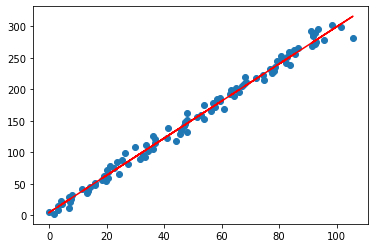

In [103]:
lr.plot_fit_boundary(X[:,:-1],Y)

In [104]:
#与sklearn对比
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X[:,:-1],Y)
predict=lr.predict(X[:,:-1])
#查看w,b
print('w:',lr.coef_,'b:',lr.intercept_)
#查看标准差
np.std(Y-predict)

w: [[2.95986075]] b: [4.62390816]


8.634350622088505